In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:\Users\Soft\Desktop\Py\Docs\Heart Disease Indicator\heart_disease_health_indicators.csv")

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df["HeartDiseaseorAttack"].value_counts()

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [5]:
from sklearn.utils import resample

In [6]:
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype("int")

In [7]:
df["HeartDiseaseorAttack"]

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    0
253677    0
253678    0
253679    1
Name: HeartDiseaseorAttack, Length: 253680, dtype: int32

In [8]:
zero_df = df[df["HeartDiseaseorAttack"]==0]
one_df = df[df["HeartDiseaseorAttack"]==1]

In [9]:
len(zero_df)

229787

In [10]:
len(one_df)

23893

In [12]:
new_zero_df = resample(zero_df, n_samples=len(one_df), replace=False)

In [13]:
len(new_zero_df)

23893

In [15]:
new_df = pd.concat([one_df, new_zero_df], axis=0)

In [16]:
new_df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,1,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
20,1,1.0,1.0,1.0,22.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,30.0,0.0,1.0,0.0,12.0,4.0,4.0
26,1,1.0,1.0,1.0,37.0,1.0,1.0,2.0,0.0,0.0,...,1.0,0.0,5.0,0.0,0.0,1.0,1.0,10.0,6.0,5.0
27,1,1.0,1.0,1.0,28.0,1.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,2.0,4.0
47,1,1.0,1.0,1.0,25.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,1.0,0.0,0.0,1.0,10.0,4.0,7.0


In [17]:
new_df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,...,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000
mean,0.500000,0.569874,0.547085,0.973737,28.892981,0.522852,0.095802,0.468652,0.705646,0.622630,...,0.955782,0.095635,2.896539,3.843364,6.469552,0.279580,0.498410,8.967543,4.913719,5.646989
std,0.500005,0.495099,0.497783,0.159918,6.695110,0.499483,0.294323,0.833905,0.455757,0.484734,...,0.205581,0.294093,1.154947,8.267785,10.566721,0.448797,0.500003,2.899577,1.029616,2.177083
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,28.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,7.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47786 entries, 8 to 141459
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  47786 non-null  int32  
 1   HighBP                47786 non-null  float64
 2   HighChol              47786 non-null  float64
 3   CholCheck             47786 non-null  float64
 4   BMI                   47786 non-null  float64
 5   Smoker                47786 non-null  float64
 6   Stroke                47786 non-null  float64
 7   Diabetes              47786 non-null  float64
 8   PhysActivity          47786 non-null  float64
 9   Fruits                47786 non-null  float64
 10  Veggies               47786 non-null  float64
 11  HvyAlcoholConsump     47786 non-null  float64
 12  AnyHealthcare         47786 non-null  float64
 13  NoDocbcCost           47786 non-null  float64
 14  GenHlth               47786 non-null  float64
 15  MentHlth              4

In [19]:
X = new_df.drop("HeartDiseaseorAttack", axis=1)

In [21]:
y = new_df["HeartDiseaseorAttack"]

In [20]:
km = KMeans(n_clusters=2)

In [22]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=43)

In [23]:
km.fit(X_tr)

KMeans(n_clusters=2)

In [24]:
y_pred = km.predict(X_te)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
accuracy_score(y_te, y_pred)

0.40805223068552776

In [28]:
cols = new_df.columns.tolist()

In [36]:
new_df.loc[:,cols[:7]].describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke
count,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000
mean,0.500000,0.569874,0.547085,0.973737,28.892981,0.522852,0.095802
std,0.500005,0.495099,0.497783,0.159918,6.695110,0.499483,0.294323
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000
50%,0.500000,1.000000,1.000000,1.000000,28.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000


In [37]:
new_df.loc[:,cols[7:14]].describe()

,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost
count,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000
mean,0.468652,0.705646,0.622630,0.790901,0.046080,0.955782,0.095635
std,0.833905,0.455757,0.484734,0.406669,0.209662,0.205581,0.294093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
new_df.loc[:,cols[14:]].describe()

,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000
mean,2.896539,3.843364,6.469552,0.279580,0.498410,8.967543,4.913719,5.646989
std,1.154947,8.267785,10.566721,0.448797,0.500003,2.899577,1.029616,2.177083
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,4.000000,2.000000,7.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<Axes: >

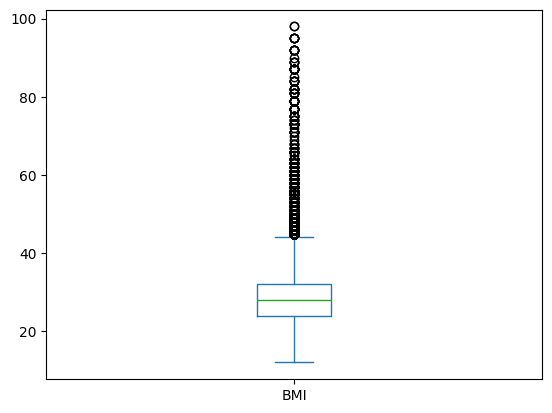

In [39]:
new_df["BMI"].plot.box()

In [45]:
new_df["BMI"].quantile(0.97)

43.0

<Axes: >

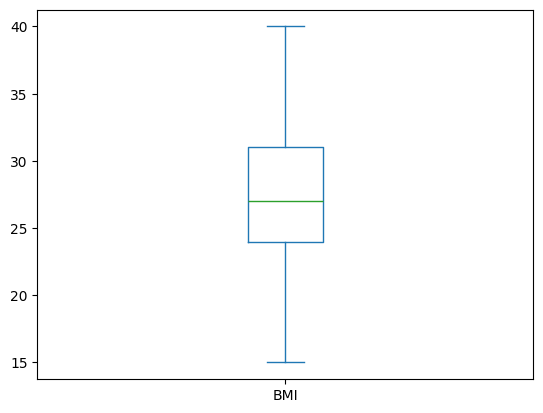

In [48]:
new_df[(new_df["BMI"]>=15)&(new_df["BMI"]<=40)]["BMI"].plot.box()

In [54]:
new_df = new_df[(new_df["BMI"]>=15)&(new_df["BMI"]<=40)]

In [55]:
new_df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,1,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
20,1,1.0,1.0,1.0,22.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,30.0,0.0,1.0,0.0,12.0,4.0,4.0
26,1,1.0,1.0,1.0,37.0,1.0,1.0,2.0,0.0,0.0,...,1.0,0.0,5.0,0.0,0.0,1.0,1.0,10.0,6.0,5.0
27,1,1.0,1.0,1.0,28.0,1.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,2.0,4.0
47,1,1.0,1.0,1.0,25.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,1.0,0.0,0.0,1.0,10.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,0,0.0,0.0,0.0,23.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
114506,0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,6.0,6.0
242100,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,1.0,30.0,0.0,0.0,6.0,6.0,3.0
79869,0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,5.0,7.0


<Axes: ylabel='Frequency'>

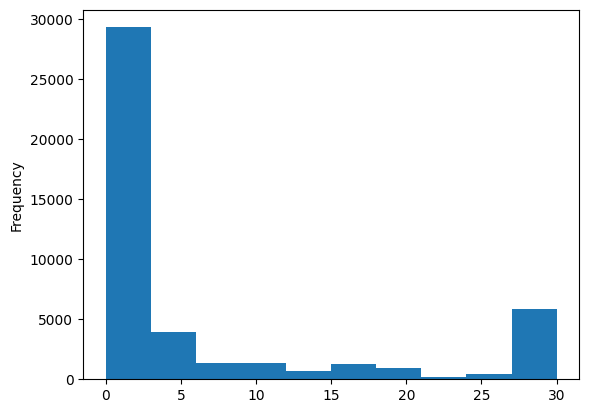

In [57]:
new_df["PhysHlth"].plot.hist()

<Axes: ylabel='Frequency'>

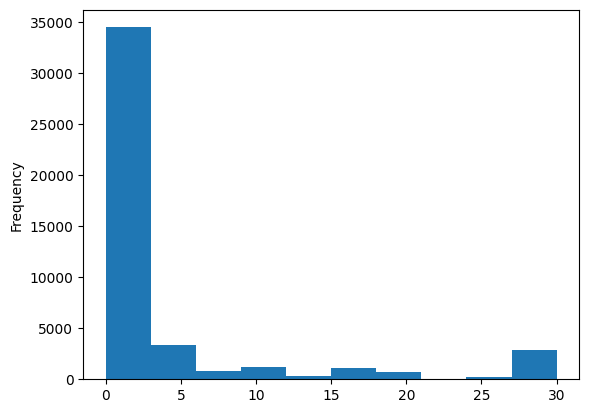

In [59]:
new_df["MentHlth"].plot.hist()

In [60]:
new_df.drop(["MentHlth", "PhysHlth"], axis=1, inplace=True)

C:\Users\Soft\AppData\Local\Temp\ipykernel_10040\2654910306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(["MentHlth", "PhysHlth"], axis=1, inplace=True)


In [61]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45287 entries, 8 to 141459
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  45287 non-null  int32  
 1   HighBP                45287 non-null  float64
 2   HighChol              45287 non-null  float64
 3   CholCheck             45287 non-null  float64
 4   BMI                   45287 non-null  float64
 5   Smoker                45287 non-null  float64
 6   Stroke                45287 non-null  float64
 7   Diabetes              45287 non-null  float64
 8   PhysActivity          45287 non-null  float64
 9   Fruits                45287 non-null  float64
 10  Veggies               45287 non-null  float64
 11  HvyAlcoholConsump     45287 non-null  float64
 12  AnyHealthcare         45287 non-null  float64
 13  NoDocbcCost           45287 non-null  float64
 14  GenHlth               45287 non-null  float64
 15  DiffWalk              4

In [62]:
new_df.reset_index(drop=True, inplace=True)

In [63]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45287 entries, 0 to 45286
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  45287 non-null  int32  
 1   HighBP                45287 non-null  float64
 2   HighChol              45287 non-null  float64
 3   CholCheck             45287 non-null  float64
 4   BMI                   45287 non-null  float64
 5   Smoker                45287 non-null  float64
 6   Stroke                45287 non-null  float64
 7   Diabetes              45287 non-null  float64
 8   PhysActivity          45287 non-null  float64
 9   Fruits                45287 non-null  float64
 10  Veggies               45287 non-null  float64
 11  HvyAlcoholConsump     45287 non-null  float64
 12  AnyHealthcare         45287 non-null  float64
 13  NoDocbcCost           45287 non-null  float64
 14  GenHlth               45287 non-null  float64
 15  DiffWalk           

In [84]:
X = new_df.drop("HeartDiseaseorAttack", axis=1)
y = new_df["HeartDiseaseorAttack"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=764)

In [85]:
km2 = KMeans(n_clusters=2)

In [86]:
km2.fit(X_tr)

KMeans(n_clusters=2)

In [87]:
y_pr2 = km2.predict(X_te)

In [88]:
accuracy_score(y_te, y_pr2)

0.6962550786080198